Churn : Churn refers to the number of customers who end their relationship with a company within a given period. 
[For more Information click Here](https://en.wikipedia.org/wiki/Churn_rate)

In [1]:
###Churn and Retention Analysis
![ChurnAnalysis](images/cc.jpg)

'[ChurnAnalysis]' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
df = pd.read_csv(r"C:\Users\ashna\OneDrive\Desktop\EDA project\WA_Fn-UseC_-Telco-Customer-Churn (1).csv")
print("data frame\n\n",df)


data frame

       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...

In [2]:
print("Number of columns:",len(df.columns))
print("And their names are:",df.columns)

Number of columns: 21
And their names are: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [3]:
#and their data types are
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

##while examine data types of fields we realized that we have to convert totalcharges field into numeric fields as it contains
numeric values.  

In [4]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors = "coerce")
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

#Null Handling

In [5]:
print("Total Null Values in our Data set:",df.isnull().sum().sum())
print("Total Null Values in our Data set(column wise):\n\n")
print(df.isnull().sum())

Total Null Values in our Data set: 11
Total Null Values in our Data set(column wise):


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [6]:
df = df.fillna(0)
print("Total Null Values in our Data set after fillna:",df.isnull().sum().sum())

Total Null Values in our Data set after fillna: 0


In [27]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [7]:
df["SeniorCitizen"] = df["SeniorCitizen"].replace(0,"no")
df["SeniorCitizen"] = df["SeniorCitizen"].replace(1,"yes")

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


#### Insights(Tenure)

Customers are widely spread across tenure periods.
Median (29) < Mean (32.37) → right-skewed distribution
25% customers leave within 9 months
75% customers stay up to 55 months
Presence of new customers (tenure = 0) indicates recently joined users.
###### course of action
Early-stage churn is significant → focus retention strategies within first year.

#### Insights(Monthly Charges)

Median > Mean → left-skewed distribution
Majority customers pay between ₹35.5 – ₹89.85
High standard deviation indicates multiple pricing plans

###### course of action
Customers with higher monthly charges may be more sensitive to price → potential churn risk.

#### Insights
Mean >> Median → strong right skew
Many customers have low total charges
Zero values align with new customers (tenure = 0)
High variability confirms revenue concentration among long-term users

###### course of action
Long-tenure customers generate most revenue → retention is more valuable than acquisition

In [10]:
df.info()
print("Number of duplicate records:")
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 📉 Objectives of Churn Analysis

- *Churn Distribution*
  - Bar graph (count plot) using Churn
  - Helps identify the proportion of churned vs retained customers

- *Churn Distribution by Gender*
  - Count plot with Churn and gender
  - Analyzes churn behavior across different genders

- *Numerical Feature Analysis*
  - Box and whisker plots using:
    - Churn vs tenure
    - Churn vs MonthlyCharges
    - Churn vs TotalCharges
  - Compares distributions and detects outliers

- *Correlation Analysis*
  - Heat map using tenure, MonthlyCharges, TotalCharges, SeniorCitizen, and Churn
  - Identifies relationships between numerical features and churn

- *Behavioral Pattern Analysis*
  - Scatter plots using:
    - tenure vs MonthlyCharges (hue: Churn)
    - tenure vs TotalCharges (hue: Churn)
  - Highlights churn-prone customer segments

[]

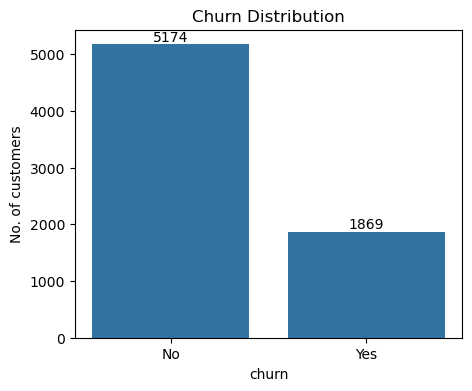

In [11]:
#churn Distribution 

plt.figure(figsize = (5,4))
ax = sbn.countplot(x = df["Churn"],data = df)
plt.bar_label(ax.containers[0])
plt.title("Churn Distribution")
plt.ylabel("No. of customers")
plt.xlabel("churn")
plt.plot()


[]

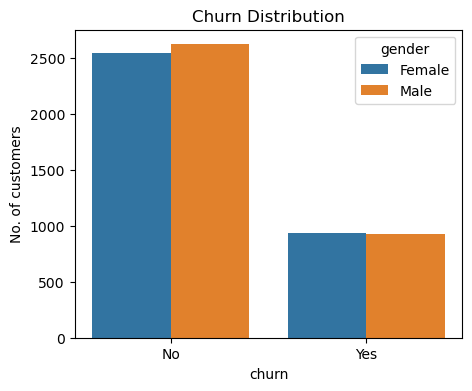

In [12]:
#churn Distribution 

plt.figure(figsize = (5,4))
ax = sbn.countplot(x = df["Churn"],data = df,hue = "gender")
plt.title("Churn Distribution")
plt.ylabel("No. of customers")
plt.xlabel("churn")
plt.plot()


###Insights

As clearly seen, both *male and female customers churn in almost equal proportions, indicating that **gender does not have a significant impact on customer churn* in this dataset.

In [34]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,no,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,no,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,no,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


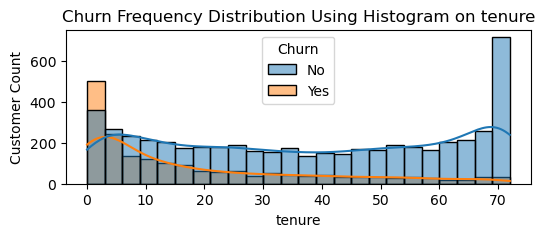

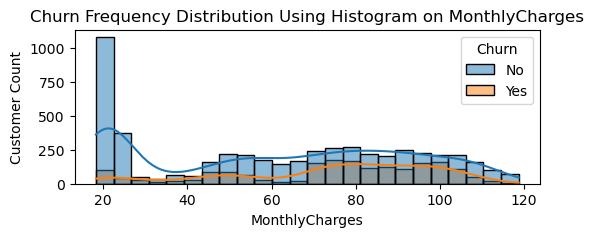

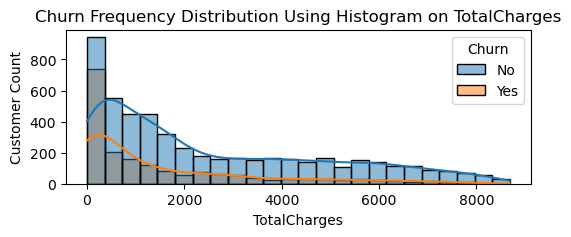

In [13]:

X = ["tenure","MonthlyCharges","TotalCharges"]
for i in X:
    plt.figure(figsize = (6,2)) 
    plt.title(f"Churn Frequency Distribution Using Histogram on {i}")
    sbn.histplot(x = i,data = df,bins = 24,hue = "Churn",kde = True)
    plt.ylabel("Customer Count")
    plt.show()

### 📊 Churn Analysis Summary

#### 🕒 1. Tenure vs Churn
- 🆕 Customers with **short tenure** have a **much higher chance of churning**.
- 📉 Churn decreases steadily as **tenure increases**.
- 🤝 Long-term customers show **strong loyalty and stability**.
- 🚀 Early onboarding and engagement are **critical to reduce churn**.

---

#### 💸 2. Monthly Charges vs Churn
- 💰 Customers with **higher monthly charges** are **more likely to churn**.
- ⚖️ Churn is concentrated in the **mid-to-high price range**.
- 👍 Customers with **lower monthly bills** are generally more stable.
- 🎁 Pricing perception and value play a **key role in retention**.

---

#### 📈 3. Total Charges vs Churn
- 🔄 **Low total charges** are associated with **higher churn**, reflecting short-term customers.
- 📊 Customers with **high total charges** rarely churn.
- ⏳ Longer customer relationships lead to **better retention**.
- 🌱 Loyalty strengthens after the **early lifecycle stage**.

---

### 🔑 Overall Takeaways
- ⚠️ **New customers are the most vulnerable** to churn.
- 💵 **Higher costs increase churn risk** due to price sensitivity.
- ⭐ **Long-term customers are loyal and stable**.


In [36]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
df["Churn"] = df["Churn"].map({"Yes":1,"No":0})

In [15]:
#heatmap ----> shows correaltion
corr_data = df.corr(numeric_only = True)
corr_data

,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.247900,0.826178,-0.352229
MonthlyCharges,0.247900,1.000000,0.651174,0.193356
TotalCharges,0.826178,0.651174,1.000000,-0.198324
Churn,-0.352229,0.193356,-0.198324,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

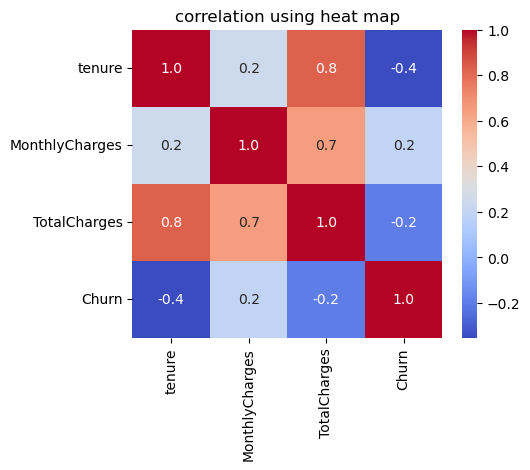

In [16]:
plt.figure(figsize = (5,4))
sbn.heatmap(
     corr_data,
     annot = True,
     fmt = "0.1f",
     cmap = "coolwarm")
plt.title("correlation using heat map")
plt.show

## 🔍 Correlation Analysis 📊

- ⏳ **Tenure vs TotalCharges (≈ 0.80):** Strong positive correlation, indicating that customers with longer tenure generate significantly higher total revenue.
- 💰 **MonthlyCharges vs TotalCharges (≈ 0.70):** Moderate to strong positive relationship, showing monthly pricing strongly contributes to total charges.
- 🚪 **Churn vs Tenure (≈ -0.40):** Moderate negative correlation, meaning customers with shorter tenure are more likely to churn.
- 💵 **MonthlyCharges vs Churn (≈ 0.20):** Weak positive correlation, suggesting pricing alone is not a strong churn driver.
- 📉 **TotalCharges vs Churn (≈ -0.20):** Weak negative correlation, reflecting lower accumulated charges among churned customers.
- ⚠️ **Multicollinearity Alert:** High correlation between **Tenure and TotalCharges (≈ 0.80)** may impact model stability.

## 🚀 Course of Action 🎯

- 🛡️ Target retention campaigns toward customers with **low tenure (< 6 months)**.
- 📌 Prioritize **tenure** as a key feature in churn prediction models.
- 🧮 Use **regularization techniques (Lasso/Ridge)** or drop one of the highly correlated features.
- 🔍 Combine **MonthlyCharges** with usage and engagement metrics for better churn prediction.
- 📈 Track early customer behavior to proactively reduce churn risk.
